# Waste Classification 🚮

## Problem Statement

In Pakistan, waste management presents a significant challenge, with millions of tons of waste being generated annually. Unfortunately, a considerable portion of this waste finds its way into landfills, worsening health hazards for both humans and animals.

Landfills can cause pollution that leads to various diseases. 

These diseases include:

* Respiratory and digestive diseases
* Rabies
* Typhoid fever
* Cancer
* Kidney and liver diseases




Sources:
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6617357/
2. https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(20)30101-7/fulltext
3. https://www.researchgate.net/publication/361688279_An_overview_of_the_environmental_pollution_and_health_effects_associated_with_waste_landfilling_and_open_dumping

With the advancement of technology, it is our sole responsibility to make efforts to save our environment. We have to establish efficient waste management systems and educate people to begin managing waste at home. By implementing strong and efficient municipal systems, we can reduce the amount of waste ending up in landfills, and if done correctly, we can increase recycling rates. Additionally, organic waste management is important and beneficial for the environment. Organic waste can be utilized for composting or as a resource for heat, electricity, and fuel through methods such as incineration or anaerobic digestion.

## About Dataset

This dataset has two classes Organic waste and Recyclable waste.

Dataset is divided into train data (85%) and test data (15%)

Training data - 22564 images Test data - 2513 images


Link: https://www.kaggle.com/datasets/techsash/waste-classification-data

In [30]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import random
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [31]:
train_dir = '/kaggle/input/waste-classification-data/DATASET/TRAIN'
test_dir = '/kaggle/input/waste-classification-data/DATASET/TEST'

In [32]:
# List to store file paths and labels
data = {'file_path': [], 'label': []}

# Iterate through the subdirectories
for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    if os.path.isdir(label_dir):
        # Iterate through the image files in the subdirectory
        for file in os.listdir(label_dir):
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                file_path = os.path.join(label_dir, file)
                data['file_path'].append(file_path)
                data['label'].append(label)

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df.head())

                                           file_path label
0  /kaggle/input/waste-classification-data/DATASE...     R
1  /kaggle/input/waste-classification-data/DATASE...     R
2  /kaggle/input/waste-classification-data/DATASE...     R
3  /kaggle/input/waste-classification-data/DATASE...     R
4  /kaggle/input/waste-classification-data/DATASE...     R


In [33]:
df['label'].value_counts()

label
O    12565
R     9999
Name: count, dtype: int64

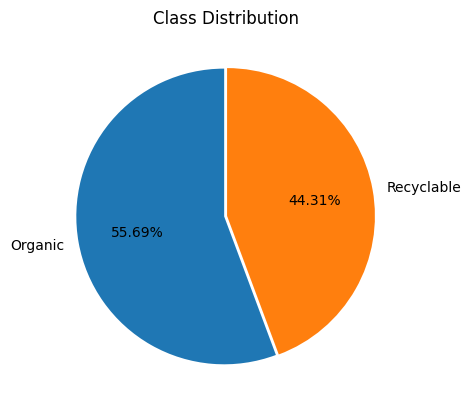

In [34]:
plt.pie(df['label'].value_counts(),
        autopct='%0.2f%%', 
        labels=['Organic', 'Recyclable'], 
        startangle=90, 
        explode=[0.01, 0.01])

plt.title('Class Distribution')
plt.show()

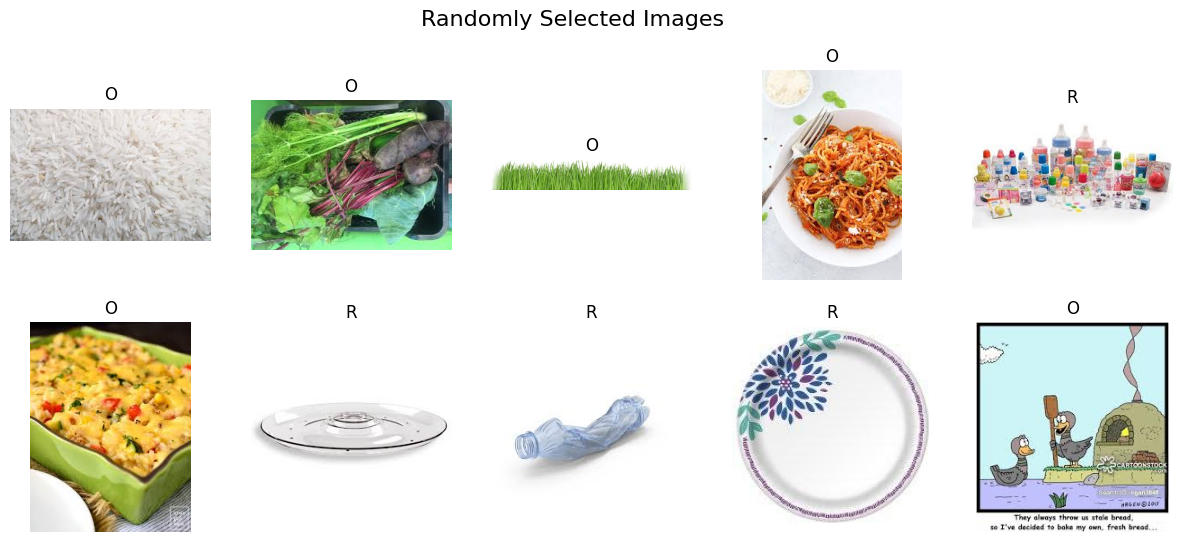

In [35]:
# Function to plot random images
def plot_random_images(dataframe, num_images=10):
    # Randomly select 10 indices
    indices = random.sample(range(len(dataframe)), num_images)
    
    # Create subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Randomly Selected Images', fontsize=16)
    
    # Plot each image
    for i, idx in enumerate(indices):
        row = i // 5
        col = i % 5
        image_path = dataframe.iloc[idx]['file_path']
        label = dataframe.iloc[idx]['label']
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        # OpenCV reads in BGR format, converting it to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.show()

# Plot random images
plot_random_images(df)

## Preprocessing

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

## Train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(250,250), 
                                                    batch_size=256, 
                                                    class_mode='binary')


## test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(250,250), 
                                                  batch_size=256, 
                                                  class_mode='binary')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## Model Construction

In [37]:
## Construct convolutional neural network (CNN) model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(250,250,3)),
    keras.layers.MaxPool2D(2,2),
                          
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    27,558,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,667,905 (105.54 MB)

 Trainable params: 27,667,905 (105.54 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
## Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
## Train the model
history = model.fit(train_generator, 
                    validation_data=test_generator,
                    epochs=15)

Epoch 1/15


W0000 00:00:1710507390.834070     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6528 - loss: 3.2592

W0000 00:00:1710507664.424579     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.6536 - loss: 3.2476 - val_accuracy: 0.8472 - val_loss: 0.4240
Epoch 2/15


W0000 00:00:1710507671.847799     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.7946 - loss: 3.0154 - val_accuracy: 0.8667 - val_loss: 0.4402
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.7683 - loss: 4.3147 - val_accuracy: 0.8281 - val_loss: 0.4362
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.8058 - loss: 0.5642 - val_accuracy: 0.8134 - val_loss: 0.4341
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.7985 - loss: 1.0217 - val_accuracy: 0.8599 - val_loss: 0.3905
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.8142 - loss: 0.8297 - val_accuracy: 0.8595 - val_loss: 0.3884
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.8203 - loss: 1.2446 - val_accuracy: 0.8735 - val_loss: 0.3460
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.8244 - loss: 0.5018 - val_accuracy: 0.8790 - val_loss: 0.3234
Epoch 9/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.8278 - loss: 0.4903 - val_accuracy: 0.8854 - val_loss: 0.

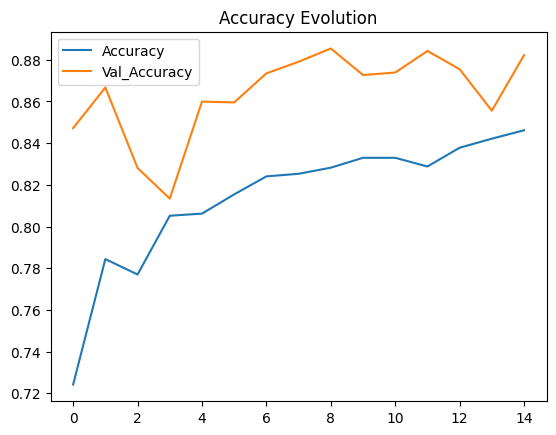

In [40]:
## Accuracy plot
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

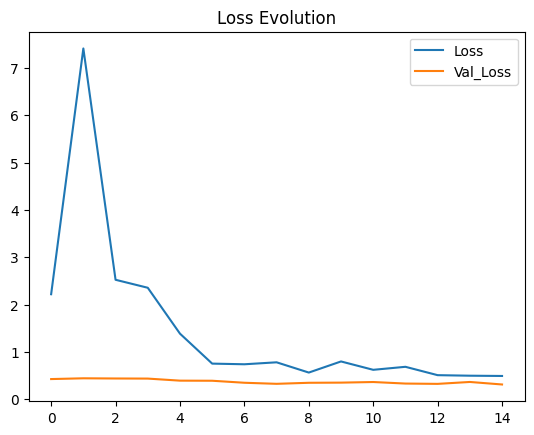

In [41]:
## Loss plot
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')
plt.show()

## Model Prediction

In [42]:
# Function to predict and plot a random image
def predict_and_plot_random_image(model, test_dir):
    # List subdirectories
    subdirs = os.listdir(test_dir)
    # Randomly select a subdirectory (label)
    random_label = random.choice(subdirs)
    label_dir = os.path.join(test_dir, random_label)
    # Randomly select an image file
    random_image_file = random.choice(os.listdir(label_dir))
    # Load the image
    image_path = os.path.join(label_dir, random_image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize the image to match model input size
    resized_image = cv2.resize(image, (250, 250))  # Adjust size according to your model input size
    # Normalize the image
    normalized_image = resized_image / 255.0
    # Reshape the image for prediction (add batch dimension)
    input_image = np.expand_dims(normalized_image, axis=0)
    # Make prediction
    prediction = model.predict(input_image)
    predicted_label = subdirs[np.argmax(prediction)]
    
    # Plot the image and predicted label
    plt.imshow(image)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


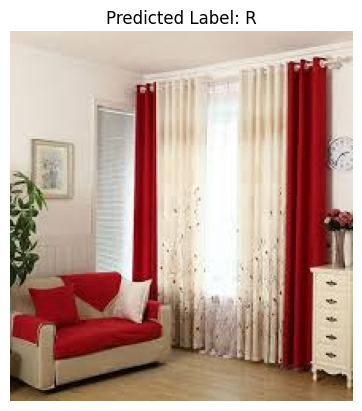

In [48]:
# Predict and plot a random image
predict_and_plot_random_image(model, test_dir)